In [50]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline 
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [19]:
import data_explore
import pipeline_tree
import pipeline_classification

# Create Dataframe, Features and Targets

In [9]:
# All data

FILES = ['cleaned_data/cambodia_2014_cleaned.csv', 
         'cleaned_data/Maldives_2016_cleaned.csv', 
         'cleaned_data/Nepal_2016_cleaned.csv',
         'cleaned_data/Pakistan_2017_cleaned.csv',
         'cleaned_data/Philippines_2017_cleaned.csv']

COUNTRY_DATA = {
    'Cambodia': 'cleaned_data/cambodia_2014_cleaned.csv', 
    'Maldives': 'cleaned_data/Maldives_2016_cleaned.csv', 
    'Nepal': 'cleaned_data/Nepal_2016_cleaned.csv',
    'Pakistan': 'cleaned_data/Pakistan_2017_cleaned.csv',
    'Philippines': 'cleaned_data/Philippines_2017_cleaned.csv'   
}

def create_df_each_country():
    
    df_dic = {}
    for country, file in COUNTRY_DATA.items():
        df = pd.read_csv(file)
        df_dic[country] = df
        
        if 'country' in df.columns:
            df.drop(columns=['country'],inplace=True)
    return df_dic

def create_df_all_countries():
    
    df_dic={}
    for country, file in COUNTRY_DATA.items():
        df = pd.read_csv(file)
        df['country'] = country        
        df_dic[country] = df
                 
    df = pd.concat(df_dic.values(), ignore_index=True)
    return df

#create dataframe containing all 5 countries
df = create_df_all_countries()

#create dataframe for each country

df_dic = create_df_each_country()

df_Cambodia = df_dic['Cambodia']
df_Maldives = df_dic['Maldives']
df_Nepal = df_dic['Nepal']
df_Pakistan = df_dic['Pakistan']
df_Philippines = df_dic['Philippines']

# Visualize None Values

In [61]:
#All features and targets

NUMERIC_FEATURES = ['age','education','num_household','num_child',
                    'partner_edu','if_own_house','if_employment_current']
CATGORICAL_FEATURES = ['if_urban','wealth_index','if_earn_more','sex_head_household', 
              'partner_ideal_child','money_decide_person']
FEATURES = NUMERIC_FEATURES + CATGORICAL_FEATURES
TARGET_LST = ['if_emo_vio', 'if_phy_vio', 'if_sex_vio', 'if_vio']

In [62]:
#Get propotions of None values

def missing_propotion(df):
    
        prop_dic={}
    for col in df:
        val_prop = df[col].isna().astype(int).sum()/df.shape[0]
        if val_prop !=0:
            prop_dic[col] = [val_prop]
        
    return prop_dic

features_none_prop = missing_propotion(df[FEATURES])
target_none_prop = missing_propotion(df[TARGET_LST])

features_none_df = pd.DataFrame.from_dict(features_none_prop, orient='index', \
                                          columns=['None Value Proportion']).reset_index()
features_none_df.columns = ['Features', 'None Value Proportion']

target_none_df = pd.DataFrame.from_dict(target_none_prop, orient='index', \
                                        columns=['None Value Proportion']).reset_index()
target_none_df.columns = ['Target', 'None Value Proportion'] 

In [65]:
# Print out the None values in targets

target_none_df

,Target,None Value Proportion
0,if_emo_vio,0.536079
1,if_phy_vio,0.536114
2,if_sex_vio,0.536096
3,if_vio,0.536131


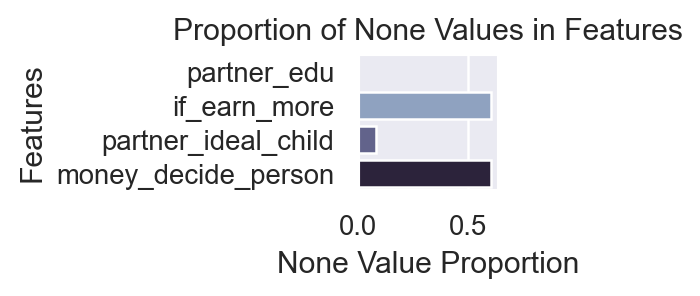

In [125]:
# Visualize None valuse

plt.figure(figsize=(1,1), dpi=180)
sns.barplot(x="None Value Proportion", y = 'Features', palette="ch:s=.25,rot=-.25", \
                data = features_none_df).set_title('''Proportion of None Values in Features''')
plt.show()

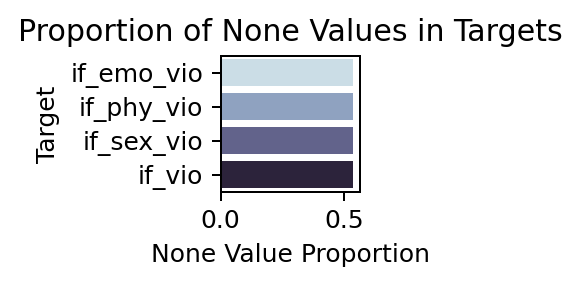

In [73]:
# Visualize None values

plt.figure(figsize=(1,1), dpi=180)
sns.barplot(x="None Value Proportion", y = 'Target', palette="ch:s=.25,rot=-.25", \
                data = target_none_df).set_title('''Proportion of None Values in Targets''')
plt.show()

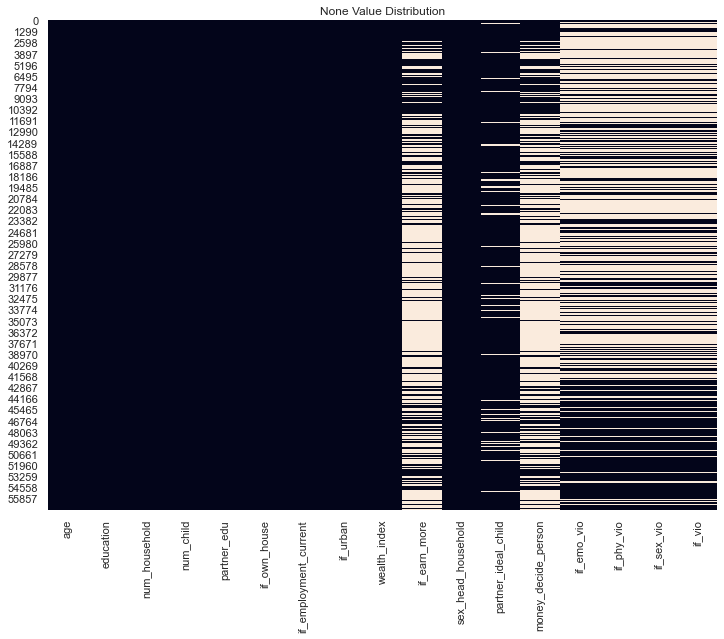

In [147]:
# visulize the None value distribution
fig, ax = plt.subplots(figsize=(12,9))

pipeline_classification.plot_df_na(df[FEATURES + TARGET_LST])

plt.title('None Value Distribution')
plt.show()


# Visulize Correlations

In [79]:
# Show correlations

data_explore.generate_corr_graph(df[FEATURES + TARGET_LST])

,age,education,num_household,num_child,if_own_house,if_employment_current,if_emo_vio,if_phy_vio,if_sex_vio,if_vio
age,1.000000,-0.105109,-0.104255,0.559626,0.241121,0.158178,0.012396,0.002700,0.005246,0.008616
education,-0.105109,1.000000,-0.118380,-0.330872,0.075785,0.068526,-0.089336,-0.189951,-0.073587,-0.135853
num_household,-0.104255,-0.118380,1.000000,0.200378,-0.230284,-0.197053,0.051479,0.062059,0.004854,0.058736
num_child,0.559626,-0.330872,0.200378,1.000000,0.092283,-0.010939,0.100992,0.119256,0.053896,0.116031
if_own_house,0.241121,0.075785,-0.230284,0.092283,1.000000,0.251134,0.011014,-0.050794,0.001354,-0.013199
if_employment_current,0.158178,0.068526,-0.197053,-0.010939,0.251134,1.000000,-0.025153,-0.012239,0.024524,-0.022790
if_emo_vio,0.012396,-0.089336,0.051479,0.100992,0.011014,-0.025153,1.000000,0.462482,0.272768,0.856860
if_phy_vio,0.002700,-0.189951,0.062059,0.119256,-0.050794,-0.012239,0.462482,1.000000,0.333684,0.693199
if_sex_vio,0.005246,-0.073587,0.004854,0.053896,0.001354,0.024524,0.272768,0.333684,1.000000,0.350672
if_vio,0.008616,-0.135853,0.058736,0.116031,-0.013199,-0.022790,0.856860,0.693199,0.350672,1.000000


# Summary Statistics

In [123]:
pd.DataFrame(df.mean())

,0
Unnamed: 0,8692.345106
year,2016.115700
age,33.015296
education,6.559268
if_union,1.000000
wealth_index_code,1.866011
if_own_house,0.339488
if_own_land,0.312694
if_employment_current,0.463379
num_household,6.348011


In [137]:
mean = df.groupby('country').mean()
mean

,Unnamed: 0,year,age,education,if_union,wealth_index_code,if_own_house,if_own_land,if_employment_current,num_household,num_child,if_emo_vio,if_phy_vio,if_phy_vio_severe,if_sex_vio,if_vio,num_vio
country,,,,,,,,,,,,,,,,,
Cambodia,8819.868529,2014.0,32.980802,5.084333,1.0,2.161553,0.761313,0.666781,0.725917,5.468804,2.594446,0.215017,0.141793,0.058641,0.040645,0.253491,0.397456
Maldives,3874.259253,2016.0,33.557473,8.666370,1.0,1.411032,0.199644,1.000000,0.407829,6.867438,2.265125,0.161384,0.096701,0.025550,0.010349,0.207956,0.268435
Nepal,6405.266963,2016.0,31.715166,4.341175,1.0,1.901252,0.087036,0.125404,0.606926,5.459612,2.532916,0.123247,0.216019,0.097087,0.074703,0.252427,0.413970
Pakistan,7535.740174,2017.0,32.118191,4.462971,1.0,2.005241,0.026686,0.019032,0.129499,8.459937,3.353882,0.302144,0.242745,0.064834,0.043138,0.365220,0.587834
Philippines,12901.733635,2017.0,34.520104,10.297443,1.0,1.654969,0.527290,0.190936,0.506701,5.409906,2.829136,0.205831,0.103994,0.040016,0.038738,0.242412,0.348562


In [138]:
median = df.groupby('country').median()
median

,Unnamed: 0,year,age,education,if_union,wealth_index_code,if_own_house,if_own_land,if_employment_current,num_household,num_child,if_emo_vio,if_phy_vio,if_phy_vio_severe,if_sex_vio,if_vio,num_vio
country,,,,,,,,,,,,,,,,,
Cambodia,8867.5,2014.0,32.0,5.0,1.0,2.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
Maldives,3897.5,2016.0,33.0,10.0,1.0,1.0,0.0,1.0,0.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
Nepal,6427.0,2016.0,31.0,4.0,1.0,2.0,0.0,0.0,1.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
Pakistan,7556.5,2017.0,32.0,0.0,1.0,2.0,0.0,0.0,0.0,7.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
Philippines,13052.0,2017.0,35.0,11.0,1.0,1.0,1.0,0.0,1.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [139]:
std = df.groupby('country').std()
std

,Unnamed: 0,year,age,education,if_union,wealth_index_code,if_own_house,if_own_land,if_employment_current,num_household,num_child,if_emo_vio,if_phy_vio,if_phy_vio_severe,if_sex_vio,if_vio,num_vio
country,,,,,,,,,,,,,,,,,
Cambodia,5118.800480,0.0,8.585149,3.820600,0.0,1.471377,0.426299,0.471384,0.446070,2.197337,1.878063,0.410898,0.348892,0.234988,0.197498,0.435077,0.758126
Maldives,2159.460860,0.0,7.780427,3.534475,0.0,1.155511,0.399768,0.000000,0.491475,3.389268,1.717500,0.367944,0.295598,0.157813,0.101220,0.405911,0.577032
Nepal,3708.814759,0.0,8.817443,4.314134,0.0,1.390067,0.281901,0.331193,0.488458,2.801088,1.778769,0.328765,0.411583,0.296117,0.262948,0.434464,0.803546
Pakistan,4351.579758,0.0,8.284005,5.243966,0.0,1.413862,0.161170,0.136642,0.335763,4.605522,2.491913,0.459245,0.428797,0.246263,0.203194,0.481552,0.865615
Philippines,7279.805673,0.0,8.491876,3.567218,0.0,1.388018,0.499271,0.393051,0.499971,2.267667,2.044634,0.404323,0.305264,0.196005,0.192978,0.428559,0.694533


In [141]:
mean.to_csv('mean_by_country.csv')
median.to_csv('median_by_country.csv')
std.to_csv('std_by_country.csv')

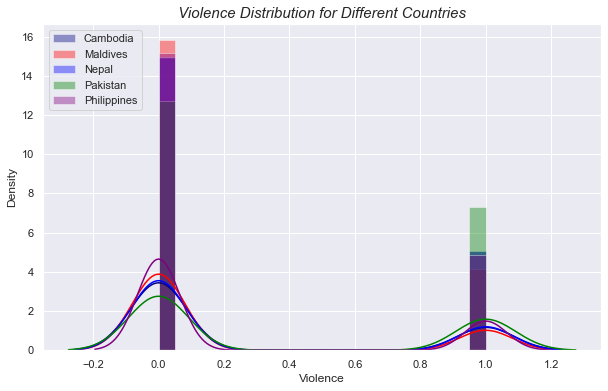

In [130]:
#Plot the number of violence category distributions for different countries

fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(df['if_vio'][df['country']=='Cambodia'], bins=20, kde=True, color='navy', label='Cambodia')
sns.distplot(df['if_vio'][df['country']=='Maldives'], bins=20, kde=True, color='red', label='Maldives')
sns.distplot(df['if_vio'][df['country']=='Nepal'], bins=20, kde=True, color='blue', label='Nepal')
sns.distplot(df['if_vio'][df['country']=='Pakistan'], bins=20, kde=True, color='green', label='Pakistan')
sns.distplot(df['if_vio'][df['country']=='Philippines'], bins=20, kde=True, color='purple', label='Philippines')

plt.xlabel('Violence')
plt.ylabel('Density')
plt.title('Violence Distribution for Different Countries', size=15, style='italic')
plt.legend(loc='upper left')
plt.show()

fig.savefig('if_vio_distribution.png')

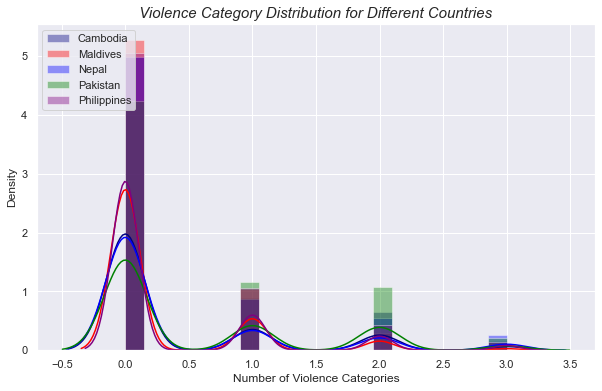

In [131]:
#Plot violence distributions for different countries

fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(df['num_vio'][df['country']=='Cambodia'], bins=20, kde=True, color='navy', label='Cambodia')
sns.distplot(df['num_vio'][df['country']=='Maldives'], bins=20, kde=True, color='red', label='Maldives')
sns.distplot(df['num_vio'][df['country']=='Nepal'], bins=20, kde=True, color='blue', label='Nepal')
sns.distplot(df['num_vio'][df['country']=='Pakistan'], bins=20, kde=True, color='green', label='Pakistan')
sns.distplot(df['num_vio'][df['country']=='Philippines'], bins=20, kde=True, color='purple', label='Philippines')

plt.xlabel('Number of Violence Categories')
plt.ylabel('Density')
plt.title('Violence Category Distribution for Different Countries', size=15, style='italic')
plt.legend(loc='upper left')
plt.show()

fig.savefig('num_vio_distribution.png')